# Importation des modules 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import nltk
from nltk.tokenize import word_tokenize
import spacy
from spacy_lefff import LefffLemmatizer, POSTagger
from spacy.language import Language
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import * 

# Importation des données


In [2]:
def myReadtxt(filename): 
    final_data=[]
    data = pd.read_csv(filename,sep="\n",header=None)
    temp=""
    for i in range(len(data)):
        if '----------' not in data[0][i]:
            temp+= "". join(data[0][i])
        else:
            final_data.append(temp)
            temp=""
            continue
    final_data.append(temp)
    return final_data

In [3]:
culture=myReadtxt('culture.txt')
economie=myReadtxt('economie.txt')
politique=myReadtxt('politique.txt')
societe=myReadtxt('societe.txt')
sport=myReadtxt('sport.txt')
print("Articles importés :")
print("Culture : %i articles \nEconomie : %i articles\nPolitique : %i articles \nSociete : %i articles \nSport : %i articles \n" %(len(culture),len(economie),len(politique),len(societe),len(sport)))

Articles importés :
Culture : 36 articles 
Economie : 21 articles
Politique : 28 articles 
Societe : 28 articles 
Sport : 29 articles 



# Creation d'une dataframe générale qui contient tous les données

In [4]:
pd_culture=pd.DataFrame({'article':culture,'category':'culture'})
pd_eco=pd.DataFrame({'article':economie,'category':'economie'})
pd_politique=pd.DataFrame({'article':politique,'category':'politique'})
pd_societe=pd.DataFrame({'article':societe,'category':'societe'})
pd_sport=pd.DataFrame({'article':sport,'category':'sport'})
#Concatenate Everything from our Text files into One Dataset
data = pd.concat([pd_culture,pd_eco,pd_politique,pd_societe,pd_sport],ignore_index=True) 
# Associate Category names with numerical index and save it in new column CategoryId
target_category = data['category'].unique()
data['categoryId'] = data['category'].factorize()[0]
data

,article,category,categoryId
0,La célébration de Rabat capitale de la culture...,culture,0
1,Les productions de la Société Nationale de Rad...,culture,0
2,La Fondation pour la Sauvegarde du Patrimoine ...,culture,0
3,"La Présidence du ministère public participera,...",culture,0
4,Le Centre régional arabe pour le patrimoine mo...,culture,0
...,...,...,...
137,Liverpool a publié un communiqué disant qu’il ...,sport,4
138,"Le Real Madrid a dominé Liverpool (1-0), ce sa...",sport,4
139,Le Youssoufia de Berrechid (CAYB) s’est qualif...,sport,4
140,Le coup d’envoi de la finale de Ligue des cham...,sport,4


In [5]:
data['category'].value_counts()

culture      36
sport        29
politique    28
societe      28
economie     21
Name: category, dtype: int64

# Visualiser notre data

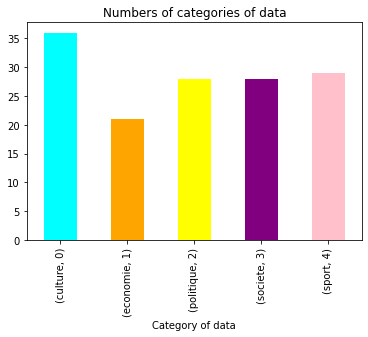

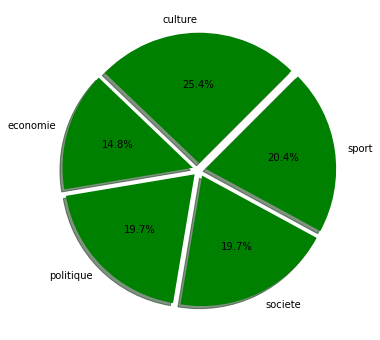

In [6]:
data.groupby('category').categoryId.value_counts().plot(kind = "bar", color = ["cyan", "orange", "yellow", "purple", "pink"])
plt.xlabel("Category of data")
plt.title("Numbers of categories of data")
plt.show()

########
fig = plt.figure(figsize = (6,6))
colors = ["green"]
culture = data[data['categoryId'] == 0 ]
economie = data[data['categoryId'] == 1 ]
politique = data[data['categoryId'] == 2]
societe = data[data['categoryId'] == 3]
sport = data[data['categoryId'] == 4]
count = [culture['categoryId'].count(), economie['categoryId'].count(), politique['categoryId'].count(), societe['categoryId'].count(), sport['categoryId'].count()]
pie = plt.pie(count, labels = ['culture', 'economie', 'politique', 'societe', 'sport'],
              autopct = "%1.1f%%",
              shadow = True,
              colors = colors,
              startangle = 45,
              explode = (0.05, 0.05, 0.05, 0.05,0.05))
########




Les mots relatifs à la categorie Culture :


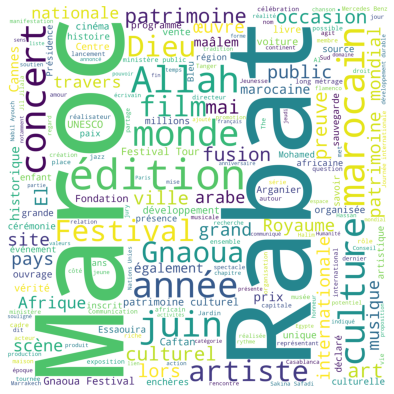

Les mots relatifs à la categorie Economie:


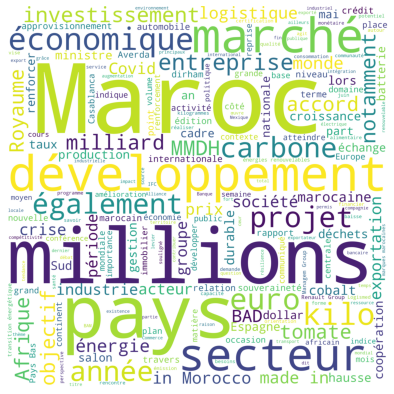

Les mots relatifs à la categorie Politique :


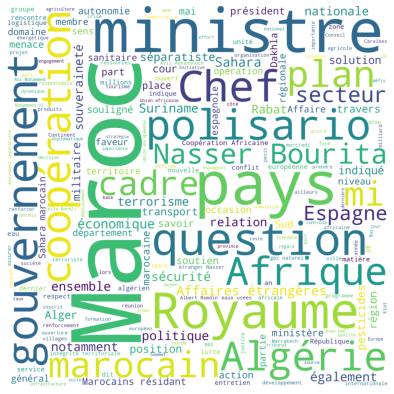

Les mots relatifs à la categorie Societe :


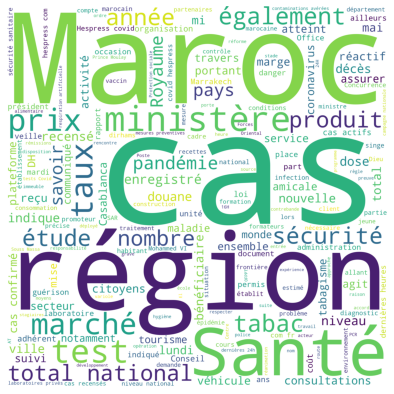

Les mots relatifs à la categorie Sport :


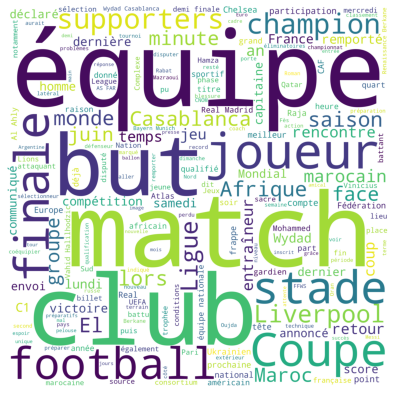

In [7]:
stop_words= pd.read_csv("stop_words_french.txt",delimiter="\n",header=None)
stop_words=stop_words[0].values.tolist()
stop_words=set(stop_words)
c = data[data['categoryId'] == 0]['article'] #culture
e = data[data['categoryId'] == 1]['article'] #eco
p = data[data['categoryId'] == 2]['article'] #politique
so = data[data['categoryId'] == 3]['article'] #societe
sp = data[data['categoryId'] == 4]['article'] #sport
def wordcloud_draw(dataset, color = 'white'):
    words = ' '.join(dataset)
    cleaned_word = ' '.join([word for word in words.split()if (word != 'avoir' and word != 'faire')])
    wordcloud = WordCloud(stopwords = stop_words,background_color = color,width = 2500, height = 2500).generate(cleaned_word)
    plt.figure(1, figsize = (10,7))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

print("Les mots relatifs à la categorie Culture :")
wordcloud_draw(c, 'white')
print("Les mots relatifs à la categorie Economie:")
wordcloud_draw(e, 'white')
print("Les mots relatifs à la categorie Politique :")
wordcloud_draw(p, 'white')
print("Les mots relatifs à la categorie Societe :")
wordcloud_draw(so, 'white')
print("Les mots relatifs à la categorie Sport :")
wordcloud_draw(sp, 'white')

# Pré-traitement des données


In [8]:
#Remove tags
def remove_tags(text):
    remove = re.compile(r'')
    return re.sub(remove, '', text)

#Remove special characters
def special_char(text):
    reviews = ''
    for x in text:
        if x.isalnum():
            reviews = reviews + x
        else:
            reviews = reviews + ' '
    return reviews

#Convert Everything in Lower Case
def convert_lower(text):
    return text.lower()

#Removing Stopwords returns a list
def remove_stopwords(text):
    stop_words= pd.read_csv("stop_words_french.txt",delimiter="\n",header=None)
    stop_words=stop_words[0].values.tolist()
    stop_words=set(stop_words)
    words = word_tokenize(text)
    return [x for x in words if x not in stop_words]

#Join text from list to string
def myJoin(text):
    return " ".join([word for word in text])

In [9]:
@Language.factory('french_lemmatizer')
def create_french_lemmatizer(nlp, name):
    return LefffLemmatizer(after_melt=True, default=True)

@Language.factory('melt_tagger')  
def create_melt_tagger(nlp, name):
    return POSTagger()
 
nlp = spacy.load('fr_core_news_sm')
nlp.add_pipe('melt_tagger', after='parser')
nlp.add_pipe('french_lemmatizer', after='melt_tagger')

def myLemmetize(text):
    doc = nlp(text)
    return " ".join([word.lemma_ for word in doc])

In [10]:
data['article'] = data['article'].apply(remove_tags)
data['article'] = data['article'].apply(special_char) #Removing special characters
data['article'] = data['article'].apply(convert_lower) #Convert To lower
data['article'] = data['article'].apply(remove_stopwords) #Remove stopwords
data['article'] = data['article'].apply(myJoin) #Join words from list to a string
data['article'] = data['article'].apply(myLemmetize) #Lemmatising words

## Selectionner les variables X_train y_train et X_test y_test

In [36]:
X=data['article']
y=data['categoryId']
x = np.array(data.iloc[:,0].values)
y = np.array(data.categoryId.values)
cv = TfidfVectorizer(max_features=25000,max_df=0.7,ngram_range=(1,3))   
x = cv.fit_transform(data.article).toarray()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3,stratify=y)

# CLASSIFICATION 

## Logistic Regression

In [37]:
LR=LogisticRegression(C=100,multi_class='multinomial')
LR.fit(x_train, y_train)
yLR_predict=LR.predict(x_test)
yLR_acc=accuracy_score(y_test,yLR_predict)
print("Logistic Regression accuracy : " , yLR_acc)

Logistic Regression accuracy :  0.8372093023255814


## Random Forest

In [38]:
RF=RandomForestClassifier(n_estimators=100 ,criterion='gini',min_samples_leaf=1)
RF.fit(x_train, y_train)
yRF_predict=RF.predict(x_test)
yRF_acc=accuracy_score(y_test,yRF_predict)
print("Random forest accuracy : " , yRF_acc)

Random forest accuracy :  0.7209302325581395


## Decision Tree Classifier


In [39]:
DT=DecisionTreeClassifier(min_samples_leaf=1)
DT.fit(x_train, y_train)
yDT_predict=DT.predict(x_test)
yDT_acc=accuracy_score(y_test,yDT_predict)
print("Decision Tree Classifier accuracy : " , yDT_acc)

Decision Tree Classifier accuracy :  0.4883720930232558


## KNN

In [40]:
KNN=KNeighborsClassifier(n_neighbors=10)
KNN.fit(x_train, y_train)
yKNN_predict=KNN.predict(x_test)
yKNN_acc=accuracy_score(y_test,yKNN_predict)
print("Random forest accuracy : " , yKNN_acc)

Random forest accuracy :  0.8837209302325582


## Support Vector Machine

In [41]:
SVM=SVC(kernel='linear')
SVM.fit(x_train, y_train)
ySVM_predict=SVM.predict(x_test)
ySVM_acc=accuracy_score(y_test,ySVM_predict)
print("Support Vector Machine accuracy : " , ySVM_acc)

Support Vector Machine accuracy :  0.7674418604651163


In [42]:
performance_list=[]  #List of performance based on each model
performance_list.append(['Logistic Regression',yLR_acc])
performance_list.append(['Random Forest', yRF_acc])
performance_list.append(['Decision Tree Classifier',yDT_acc])
performance_list.append(['KNN',yKNN_acc])
performance_list.append(['SVM', ySVM_acc])
model_performance = pd.DataFrame(data=performance_list)
model_performance.columns=['Model','Test accuracy']
model_performance.sort_values(by=['Test accuracy'],ascending=False)

,Model,Test accuracy
3,KNN,0.883721
0,Logistic Regression,0.837209
4,SVM,0.767442
1,Random Forest,0.720930
2,Decision Tree Classifier,0.488372


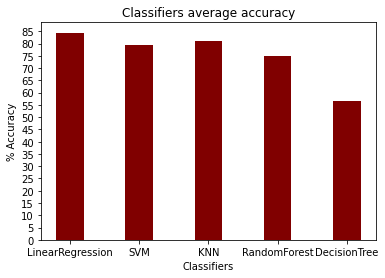

In [18]:
ff={"LinearRegression":round(0.844186*100,2),"SVM":round(0.795348*100,2),"KNN":round(0.8093022*100,2),"RandomForest":round(0.748837*100,2),"DecisionTree":round(0.565116*100,2)}
classfier = list(ff.keys())
val_classifier = list(ff.values())
plt.bar(classfier, val_classifier, color ='maroon',width = 0.4)
plt.yticks(np.arange(0,90,5))
plt.xlabel("Classifiers")
plt.ylabel("% Accuracy")
plt.title("Classifiers average accuracy")
plt.show()

# Hyperparameter Tuning

## Random Forest

In [19]:
from pprint import pprint
from time import time
import logging
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
x = np.array(data.iloc[:,0].values)
y = np.array(data.categoryId.values)
# Display progress logs on stdout
logging.basicConfig(level=logging.INFO, format="%(asctime)s %(levelname)s %(message)s")

# Define a pipeline combining a text feature extractor with a simple classifier
pipeline = Pipeline(
    [
        ("vect",TfidfVectorizer()),
        ("clf", RandomForestClassifier()),
    ]
)

# Parameters to use for grid search. Uncommenting more parameters will give
# better exploring power but will increase processing time in a combinatorial
# way

n_estimators = [100,200,300]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
parameters = {
    "vect__max_features":(None,1000,5000,25000),
    "vect__max_df": (0.5, 0.75, 1.0),
    "vect__ngram_range": ((1, 1), (1, 2),(1, 3)),  # unigrams or bigrams or trigrams
    'clf__n_estimators': n_estimators,
    'clf__min_samples_split': min_samples_split,
    'clf__min_samples_leaf': min_samples_leaf,
    'clf__max_depth':(10,100,None)
}

# Find the best parameters for both the feature extraction and the
# classifier
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1)
print("Performing grid search...")
print("pipeline:", [name for name, _ in pipeline.steps])
print("parameters:")
pprint(parameters)
t0 = time()
grid_search.fit(x, y)
print("done in %0.3fs" % (time() - t0))
print()

print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Performing grid search...
pipeline: ['vect', 'clf']
parameters:
{'clf__max_depth': (10, 100, None),
 'clf__min_samples_leaf': [1, 2, 4],
 'clf__min_samples_split': [2, 5, 10],
 'clf__n_estimators': [100, 200, 300],
 'vect__max_df': (0.5, 0.75, 1.0),
 'vect__max_features': (None, 1000, 5000, 25000),
 'vect__ngram_range': ((1, 1), (1, 2), (1, 3))}
done in 559.476s

Best score: 0.782
Best parameters set:
	clf__max_depth: None
	clf__min_samples_leaf: 1
	clf__min_samples_split: 5
	clf__n_estimators: 200
	vect__max_df: 0.75
	vect__max_features: 1000
	vect__ngram_range: (1, 1)


## Logistic Regression

In [20]:
from pprint import pprint
from time import time
import logging
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
x = np.array(data.iloc[:,0].values)
y = np.array(data.categoryId.values)
# Display progress logs on stdout
logging.basicConfig(level=logging.INFO, format="%(asctime)s %(levelname)s %(message)s")

# Define a pipeline combining a text feature extractor with a simple classifier
pipeline = Pipeline(
    [
        ("vect",TfidfVectorizer()),
        ("clf", LogisticRegression()),
    ]
)

# Parameters to use for grid search. Uncommenting more parameters will give
# better exploring power but will increase processing time in a combinatorial
# way

parameters = {
    "vect__max_features":(None,1000,5000,25000),
    "vect__max_df": (0.5, 0.75, 1.0),
    "vect__ngram_range": ((1, 1), (1, 2),(1, 3)),  # unigrams or bigrams or trigrams
    'clf__C': (1,10,100)
    
}

# Find the best parameters for both the feature extraction and the
# classifier
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1)
print("Performing grid search...")
print("pipeline:", [name for name, _ in pipeline.steps])
print("parameters:")
pprint(parameters)
t0 = time()
grid_search.fit(x, y)
print("done in %0.3fs" % (time() - t0))
print()

print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Performing grid search...
pipeline: ['vect', 'clf']
parameters:
{'clf__C': (1, 10, 100),
 'vect__max_df': (0.5, 0.75, 1.0),
 'vect__max_features': (None, 1000, 5000, 25000),
 'vect__ngram_range': ((1, 1), (1, 2), (1, 3))}
done in 83.795s

Best score: 0.831
Best parameters set:
	clf__C: 100
	vect__max_df: 0.5
	vect__max_features: 5000
	vect__ngram_range: (1, 1)


## KNN 

In [21]:
from pprint import pprint
from time import time
import logging
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
x = np.array(data.iloc[:,0].values)
y = np.array(data.categoryId.values)
# Display progress logs on stdout
logging.basicConfig(level=logging.INFO, format="%(asctime)s %(levelname)s %(message)s")

# Define a pipeline combining a text feature extractor with a simple classifier
pipeline = Pipeline(
    [
        ("vect",TfidfVectorizer()),
        ("clf", KNeighborsClassifier()),
    ]
)

# Parameters to use for grid search. Uncommenting more parameters will give
# better exploring power but will increase processing time in a combinatorial
# way

parameters = {
    "vect__max_features":(None,1000,5000,25000),
    "vect__max_df": (0.5, 0.75, 1.0),
    "vect__ngram_range": ((1, 1), (1, 2),(1, 3)),  # unigrams or bigrams or trigrams
    'clf__n_neighbors': (5,10)
    
}

# Find the best parameters for both the feature extraction and the
# classifier
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1)
print("Performing grid search...")
print("pipeline:", [name for name, _ in pipeline.steps])
print("parameters:")
pprint(parameters)
t0 = time()
grid_search.fit(x, y)
print("done in %0.3fs" % (time() - t0))
print()

print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Performing grid search...
pipeline: ['vect', 'clf']
parameters:
{'clf__n_neighbors': (5, 10),
 'vect__max_df': (0.5, 0.75, 1.0),
 'vect__max_features': (None, 1000, 5000, 25000),
 'vect__ngram_range': ((1, 1), (1, 2), (1, 3))}
done in 5.316s

Best score: 0.802
Best parameters set:
	clf__n_neighbors: 5
	vect__max_df: 0.75
	vect__max_features: None
	vect__ngram_range: (1, 3)


## SVM 

In [22]:
from pprint import pprint
from time import time
import logging
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
x = np.array(data.iloc[:,0].values)
y = np.array(data.categoryId.values)
# Display progress logs on stdout
logging.basicConfig(level=logging.INFO, format="%(asctime)s %(levelname)s %(message)s")

# Define a pipeline combining a text feature extractor with a simple classifier
pipeline = Pipeline(
    [
        ("vect",TfidfVectorizer()),
        ("clf", SVC()),
    ]
)

# Parameters to use for grid search. Uncommenting more parameters will give
# better exploring power but will increase processing time in a combinatorial
# way

parameters = {
    "vect__max_features":(None,1000,5000,25000),
    "vect__max_df": (0.5, 0.75, 1.0),
    "vect__ngram_range": ((1, 1), (1, 2),(1, 3)),  # unigrams or bigrams or trigrams
    'clf__kernel': ('linear', 'poly', 'rbf')    
}

# Find the best parameters for both the feature extraction and the
# classifier
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1)
print("Performing grid search...")
print("pipeline:", [name for name, _ in pipeline.steps])
print("parameters:")
pprint(parameters)
t0 = time()
grid_search.fit(x, y)
print("done in %0.3fs" % (time() - t0))
print()

print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Performing grid search...
pipeline: ['vect', 'clf']
parameters:
{'clf__kernel': ('linear', 'poly', 'rbf'),
 'vect__max_df': (0.5, 0.75, 1.0),
 'vect__max_features': (None, 1000, 5000, 25000),
 'vect__ngram_range': ((1, 1), (1, 2), (1, 3))}
done in 8.851s

Best score: 0.817
Best parameters set:
	clf__kernel: 'linear'
	vect__max_df: 0.5
	vect__max_features: 5000
	vect__ngram_range: (1, 1)


## Decision Tree

In [23]:
from pprint import pprint
from time import time
import logging
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
x = np.array(data.iloc[:,0].values)
y = np.array(data.categoryId.values)
# Display progress logs on stdout
logging.basicConfig(level=logging.INFO, format="%(asctime)s %(levelname)s %(message)s")

# Define a pipeline combining a text feature extractor with a simple classifier
pipeline = Pipeline(
    [
        ("vect",TfidfVectorizer()),
        ("clf", DecisionTreeClassifier()),
    ]
)

# Parameters to use for grid search. Uncommenting more parameters will give
# better exploring power but will increase processing time in a combinatorial
# way

parameters = {
    "vect__max_features":(None,1000,5000,25000),
    "vect__max_df": (0.5, 0.75, 1.0),
    "vect__ngram_range": ((1, 1), (1, 2),(1, 3)),  # unigrams or bigrams or trigrams
    'clf__criterion':('gini', 'entropy'),
    'clf__min_samples_leaf':(1,2,4),
    'clf__max_depth':(10,50,100)
    
}

# Find the best parameters for both the feature extraction and the
# classifier
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1)
print("Performing grid search...")
print("pipeline:", [name for name, _ in pipeline.steps])
print("parameters:")
pprint(parameters)
t0 = time()
grid_search.fit(x, y)
print("done in %0.3fs" % (time() - t0))
print()

print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Performing grid search...
pipeline: ['vect', 'clf']
parameters:
{'clf__criterion': ('gini', 'entropy'),
 'clf__max_depth': (10, 50, 100),
 'clf__min_samples_leaf': (1, 2, 4),
 'vect__max_df': (0.5, 0.75, 1.0),
 'vect__max_features': (None, 1000, 5000, 25000),
 'vect__ngram_range': ((1, 1), (1, 2), (1, 3))}
done in 54.689s

Best score: 0.605
Best parameters set:
	clf__criterion: 'gini'
	clf__max_depth: 50
	clf__min_samples_leaf: 2
	vect__max_df: 0.5
	vect__max_features: None
	vect__ngram_range: (1, 1)
